In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from mhd_utils_3d import write_meta_header, read_meta_header

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for Local Macbook Pro


In [21]:
stack_f = 'MD589'
vol_f = DataManager.load_intensity_volume(stack=stack_f)
# vol_f = np.pad(vol_f, 50, mode='constant', constant_values=0).astype(np.uint8)
print vol_f.shape

stack_m = 'MD594'
vol_m = DataManager.load_intensity_volume(stack=stack_m)
# vol_m = np.pad(vol_m, 50, mode='constant', constant_values=0).astype(np.uint8)
print vol_m.shape

(373, 485, 381)
(347, 538, 373)


In [22]:
# Definition of MetaImage
# https://itk.org/Wiki/ITK/MetaIO/Documentation

meta_header_f = \
    {
     'BinaryData': 'True',
     'CompressedData': 'False',
     'DimSize': ' '.join(map(str, vol_f.shape[::-1])),
     'ElementDataFile': stack_f + '.raw',
     'ElementType': 'MET_UCHAR',
     'NDims': '3',
    }
write_meta_header('/home/yuncong/%(stack)s.mhd' % {'stack': stack_f}, meta_header_f)
vol_f.tofile('/home/yuncong/%(stack)s.raw' % {'stack': stack_f})

meta_header_m = \
    {
     'BinaryData': 'True',
     'CompressedData': 'False',
     'DimSize': ' '.join(map(str, vol_m.shape[::-1])),
     'ElementDataFile': stack_m + '.raw',
     'ElementType': 'MET_UCHAR',
     'NDims': '3',
    }
write_meta_header('/home/yuncong/%(stack)s.mhd' % {'stack': stack_m}, meta_header_m)
vol_m.tofile('/home/yuncong/%(stack)s.raw' % {'stack': stack_m})

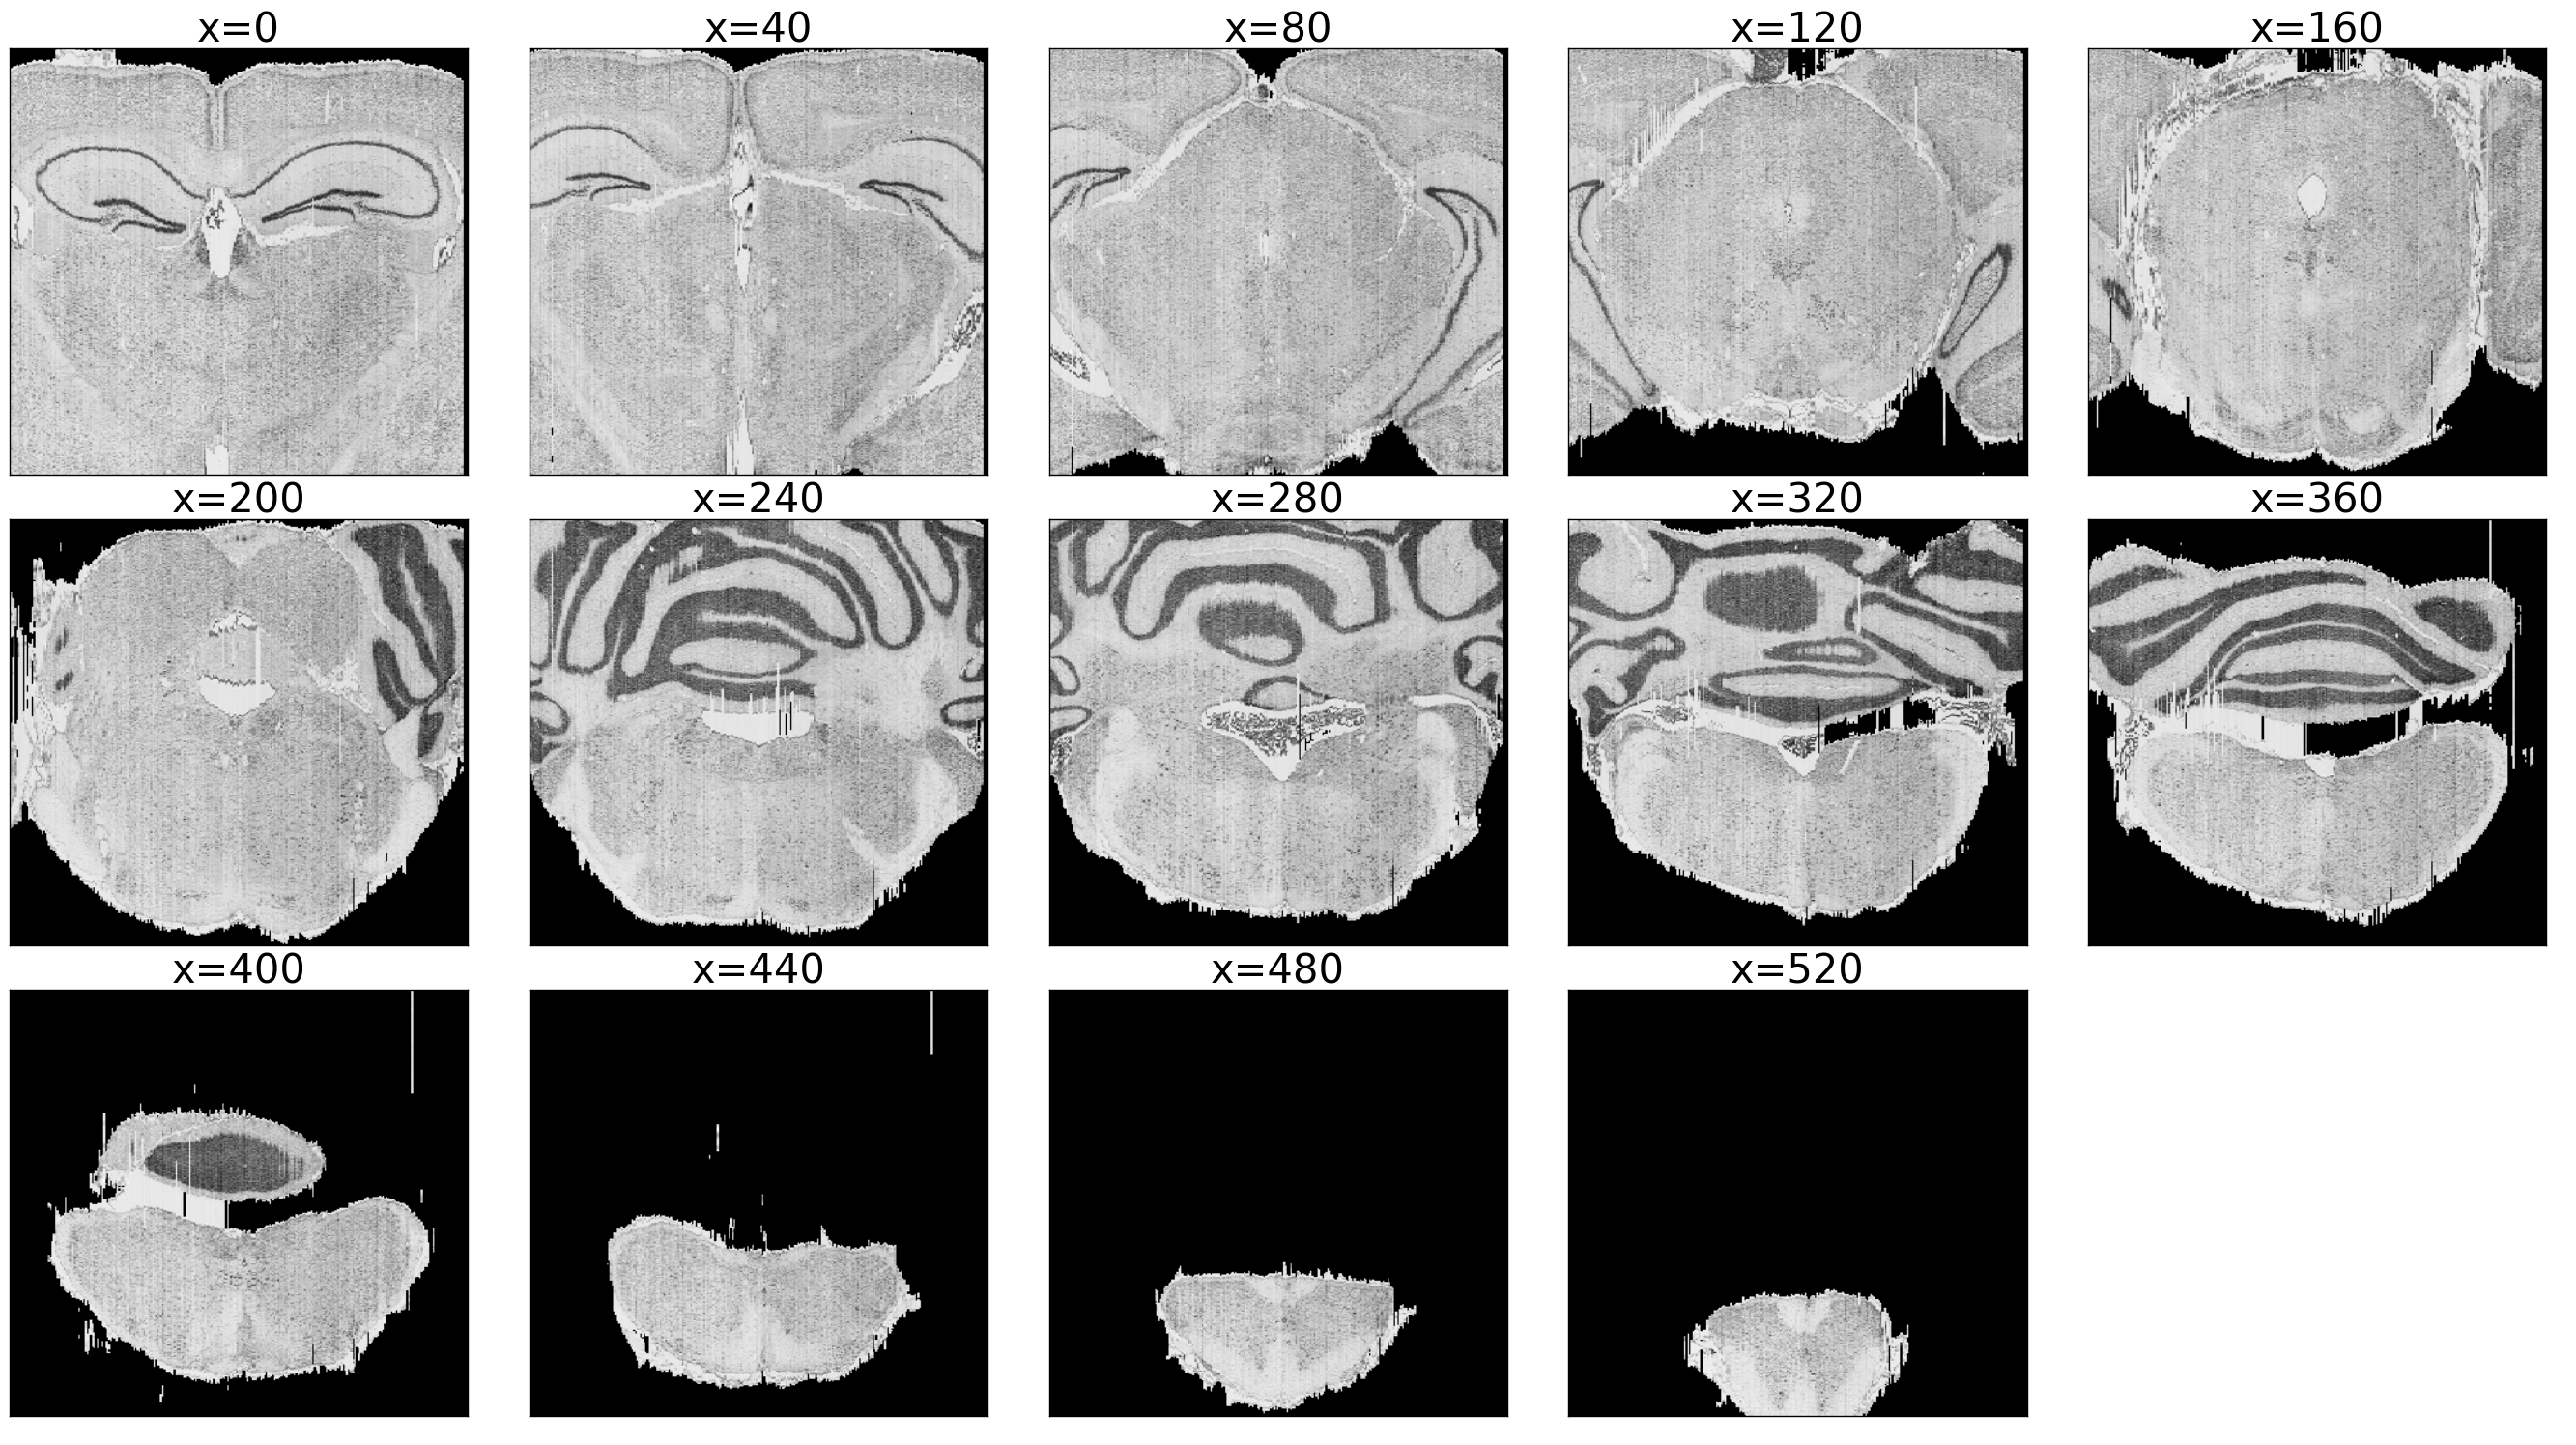

In [24]:
display_volume_sections(vol_m, every=40, cmap=plt.cm.gray, direction='x', start_level=0)

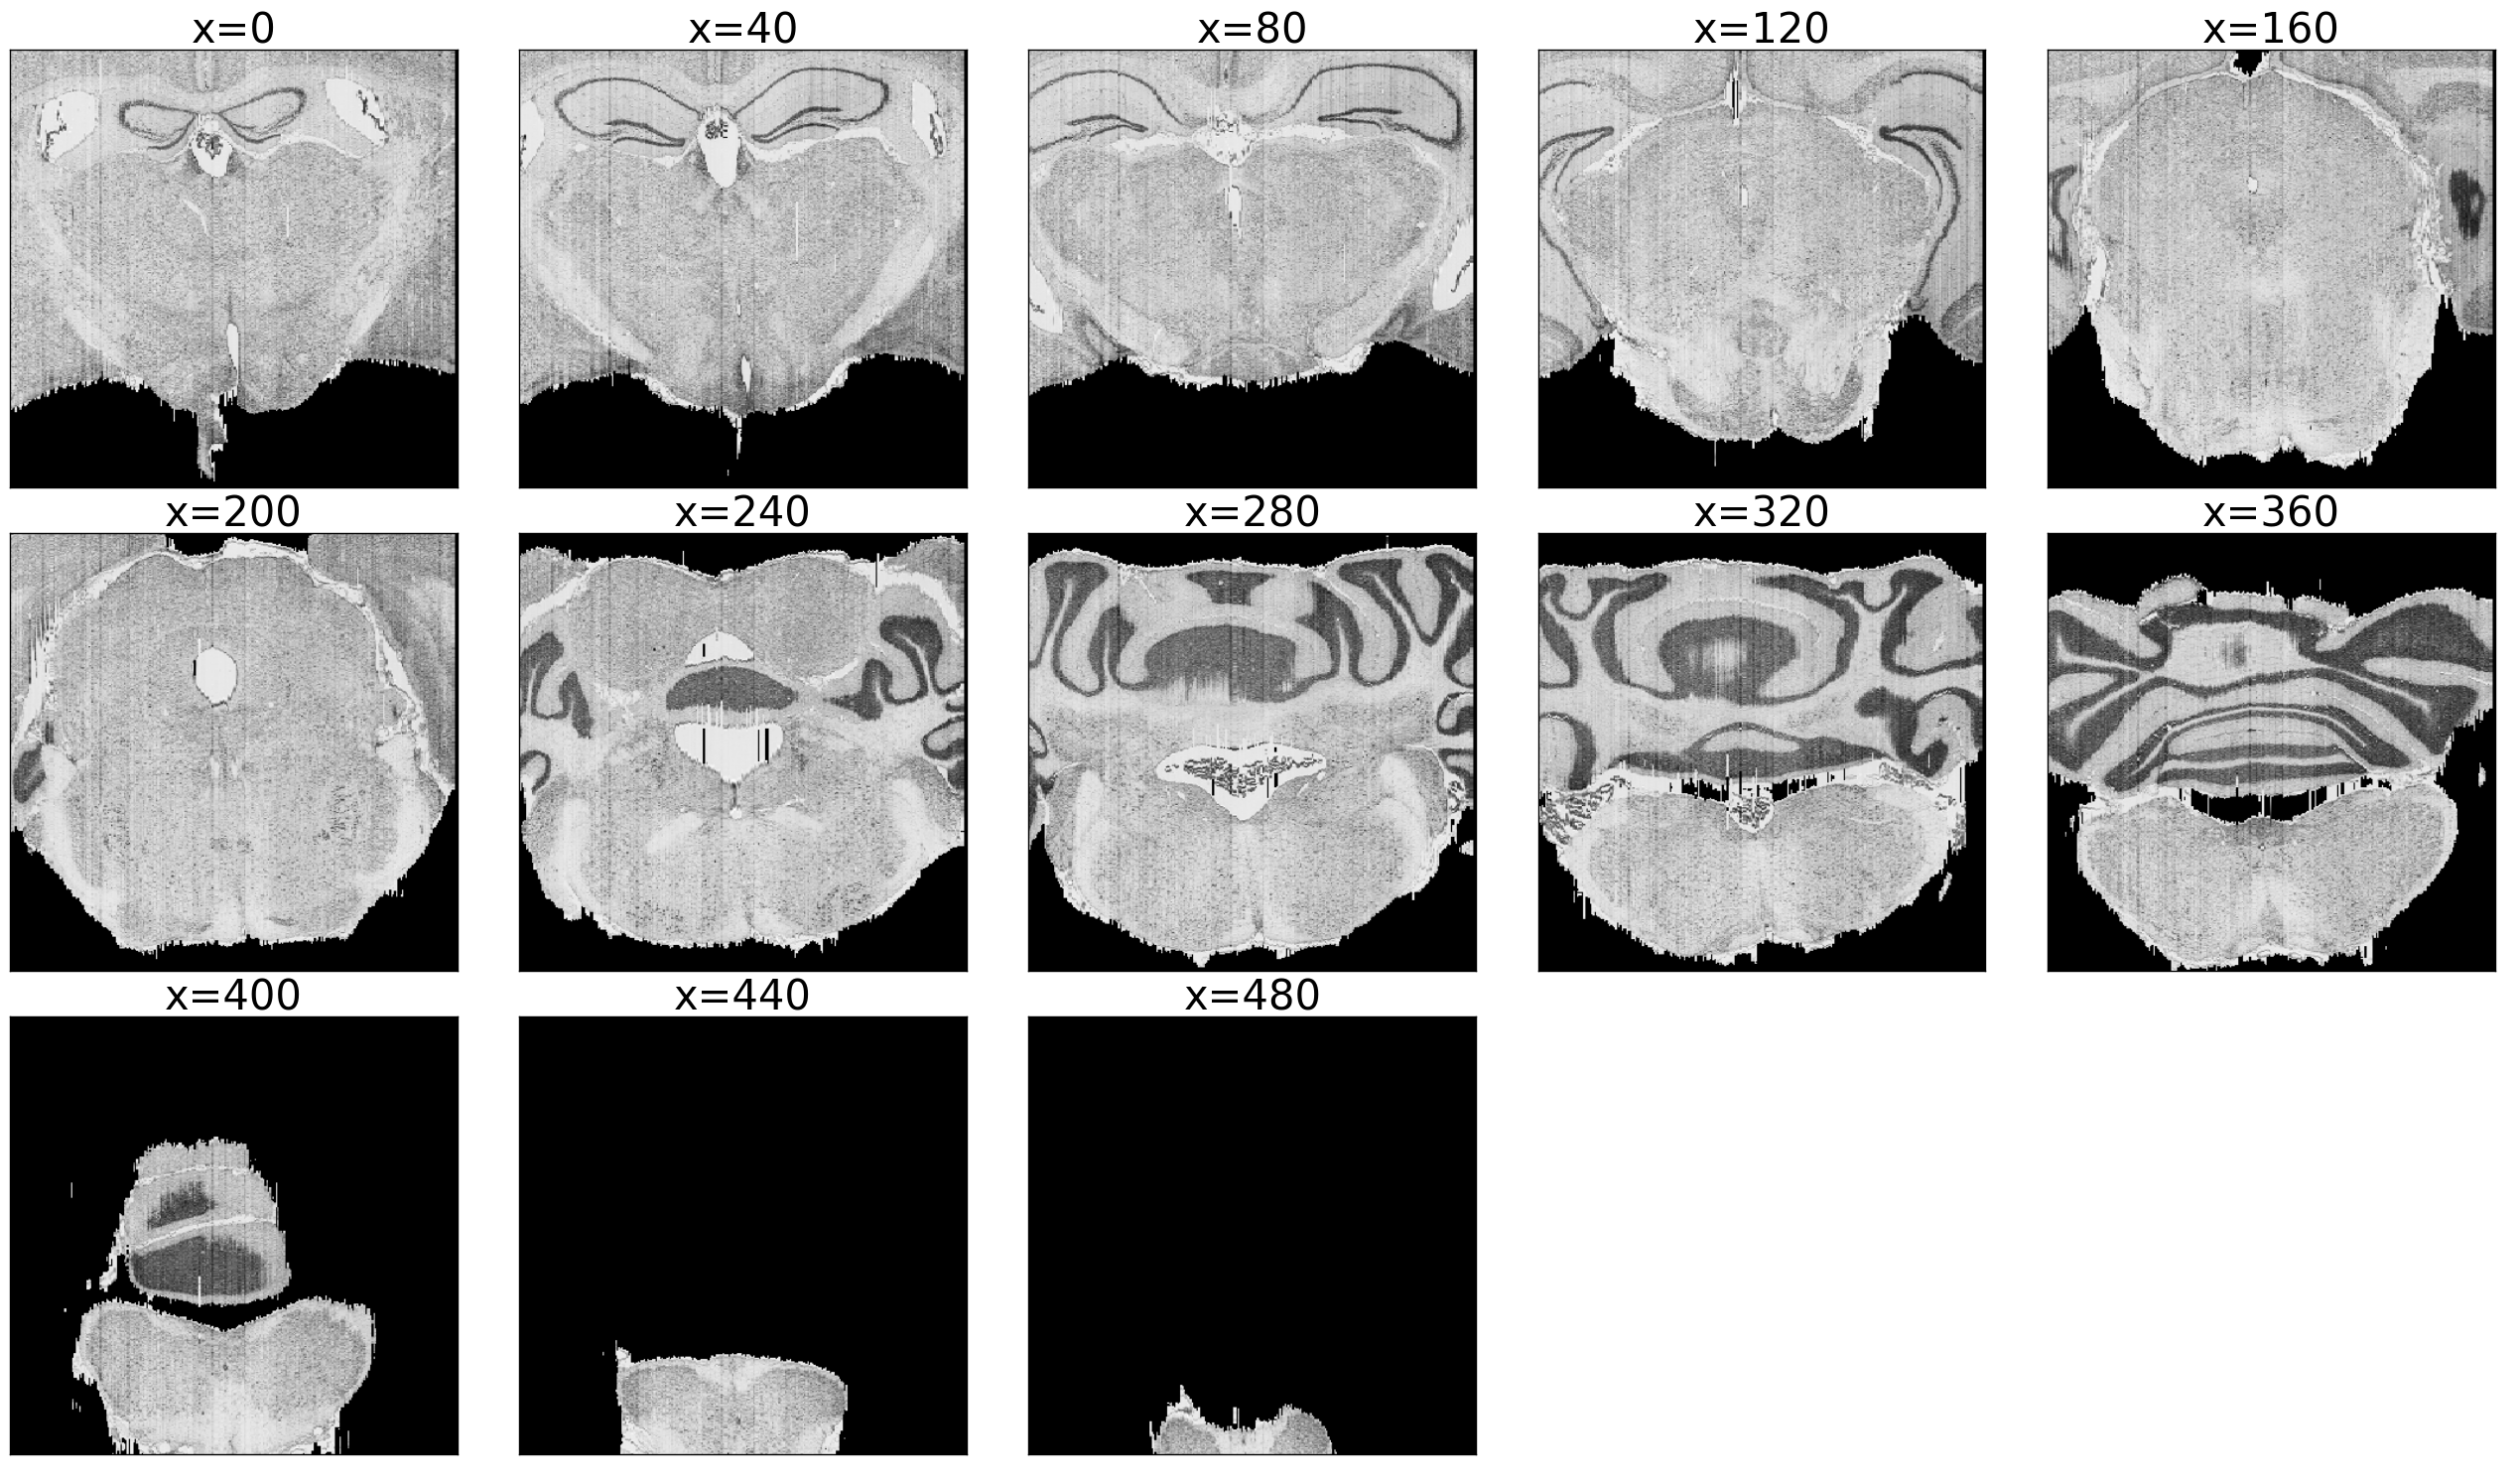

In [23]:
display_volume_sections(vol_f, every=40, cmap=plt.cm.gray, direction='x', start_level=0)

{'CompressedData': 'False', 'DimSize': '381 485 373', 'BinaryData': 'True', 'ElementSpacing': '1 1 1', 'BinaryDataByteOrderMSB': 'False', 'AnatomicalOrientation': 'RAI', 'Offset': '0 0 0', 'TransformMatrix': '1 0 0 0 1 0 0 0 1', 'NDims': '3', 'ElementType': 'MET_UCHAR', 'ElementDataFile': 'result.0.raw', 'CenterOfRotation': '0 0 0', 'ObjectType': 'Image'}
0 255


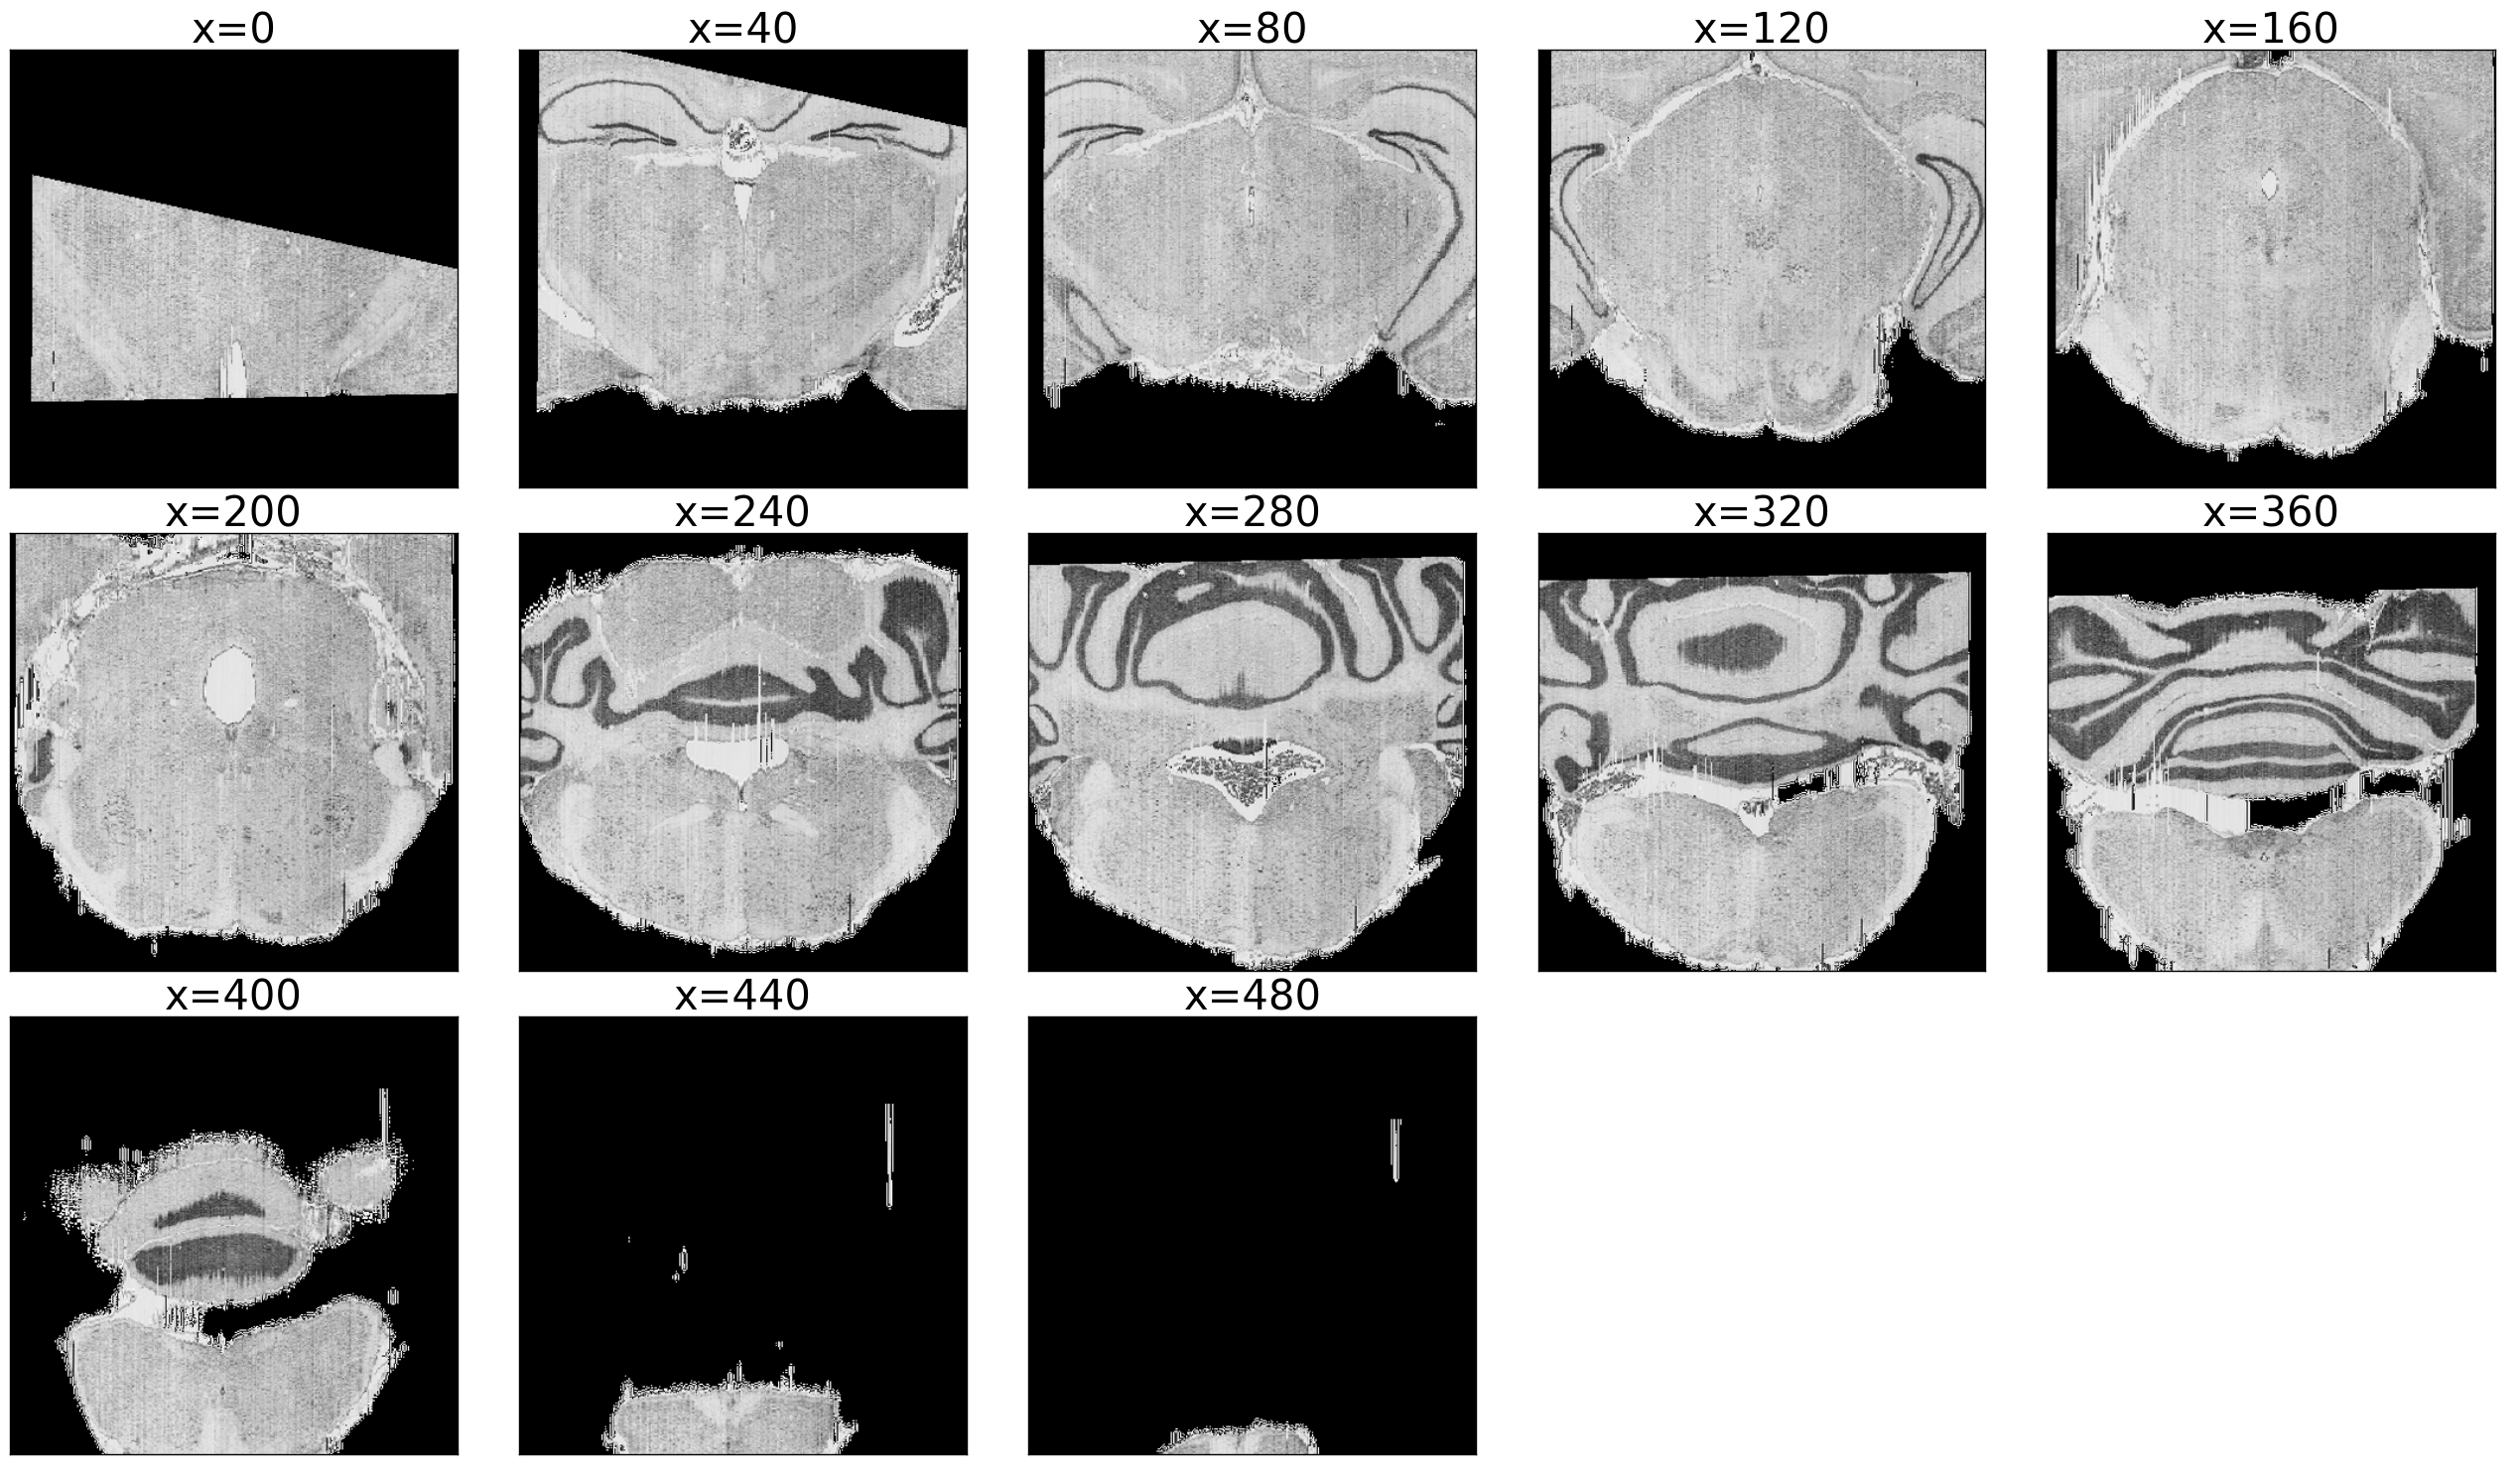

In [29]:
meta_header_mTof = read_meta_header('/home/yuncong/test/result.0.mhd')
print meta_header_mTof

vol_mTof_shape = map(int, meta_header_mTof['DimSize'].split())
vol_mTof_data = np.fromfile('/home/yuncong/test/result.0.raw', dtype=np.uint8)

vol_mTof = vol_mTof_data.reshape(vol_mTof_shape[::-1])
print vol_mTof.min(), vol_mTof.max()
display_volume_sections(vol_mTof, every=40, cmap=plt.cm.gray, direction='x', start_level=0)